# CS 522 Data Mining
# Quality Prediction in Iron Ore

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Dataset Description

This is a real time data collected during Flotation Point of the mining process. The dataset contains 24 columns.

In [51]:
df = pd.read_csv(r'C:\Hood College\Data Mining\archive\MiningProcess_Flotation_Plant_Database.csv', decimal=",", parse_dates=["date"], infer_datetime_format=True).drop_duplicates()
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [52]:
#to drop records with null entries
df = df.dropna()
df.shape

(736282, 24)

In [53]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,...,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,...,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,...,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,...,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,...,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,...,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


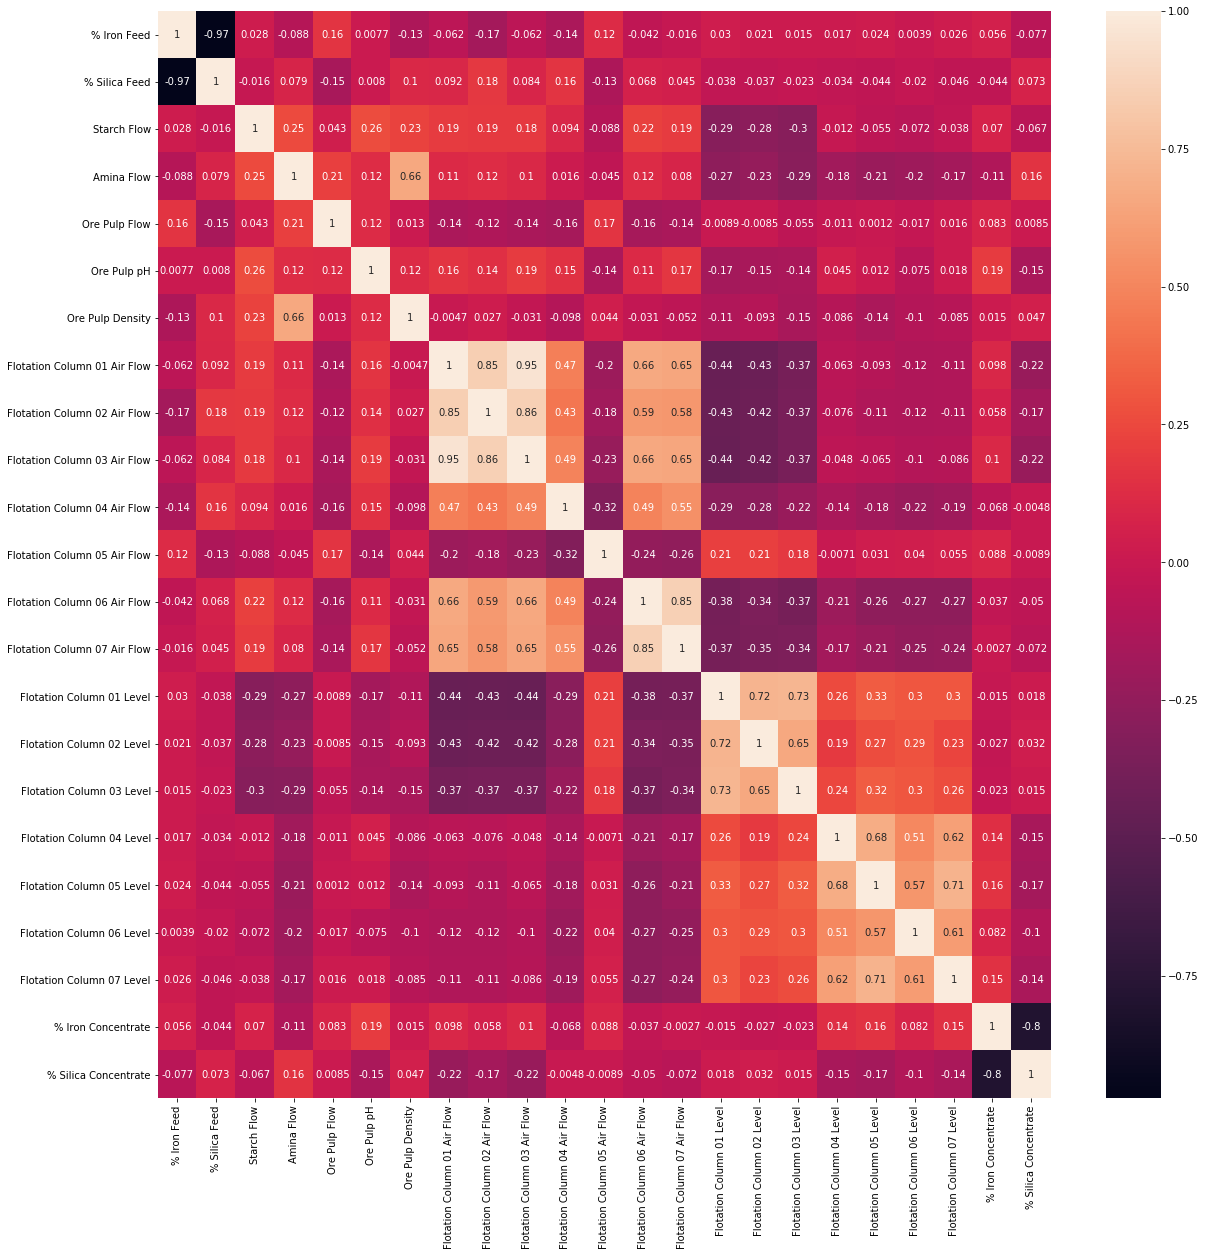

In [54]:
plt.figure(figsize=(20,20))
sb.heatmap(df.corr(), annot=True)

In [55]:
#dropping attributes that are not neccesary
df = df.drop(['date', '% Iron Concentrate', 'Ore Pulp pH', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow'], axis=1)
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp Density,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,1.74,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,1.31
1,55.2,16.98,3024.41,563.965,397.383,1.74,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,1.31
2,55.2,16.98,3043.46,568.054,399.668,1.74,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,1.31
3,55.2,16.98,3047.36,568.665,397.939,1.74,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,1.31
4,55.2,16.98,3033.69,558.167,400.254,1.74,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,1.31


In [56]:
#Y: target attribute
#X: predictors
Y = df['% Silica Concentrate']
X = df.drop(['% Silica Concentrate'], axis=1)

# Data Preprocessing

The data is preprocessed using minmax scaler and it is split into test and training sets

In [57]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score

In [58]:
minmax = preprocessing.MinMaxScaler()
X_scaled = pd.DataFrame(minmax.fit_transform(X), columns = X.columns)
train_X, test_X, train_Y, test_Y = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

# Linear Regression

In [59]:
linreg = LinearRegression()
linreg.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
y_predict = linreg.predict(test_X)
y_train_predict = linreg.predict(train_X)
rmse = (np.sqrt(mean_squared_error(train_Y, y_train_predict)))
r2 = r2_score(train_Y, y_train_predict)
print('The model performance on training set')
print('-------------------------------------')
print('RMSE is {}'. format(rmse))
print('R2 score is {}'. format(r2))
print('\n')


rmse = (np.sqrt(mean_squared_error(test_Y, y_predict)))
r2 = r2_score(test_Y, y_predict)
print('The model performance on test set')
print('---------------------------------')
print('RMSE is {}'. format(rmse))
print('R2 score is {}'. format(r2))

The model performance on training set
-------------------------------------
RMSE is 1.0761809928277388
R2 score is 0.08661304270493575


The model performance on test set
---------------------------------
RMSE is 1.073987832023612
R2 score is 0.08798130922547076


# Random Forest Regression

In [61]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1, 10):
    rf = RandomForestRegressor(max_depth=i)
    rf.fit(train_X, train_Y)
    y_predict = rf.predict(test_X)
    y_train_predict = rf.predict(train_X)
    rmse = (np.sqrt(mean_squared_error(train_Y, y_train_predict)))
    print('-------------------------------------\n')
    print('Depth: ', i)
    r2 = r2_score(train_Y, y_train_predict)
    print('The model performance on training set')
    print('-------------------------------------')
    print('RMSE is {}'. format(rmse))
    print('R2 score is {}'. format(r2))
    print('\n')


    rmse = (np.sqrt(mean_squared_error(test_Y, y_predict)))
    r2 = r2_score(test_Y, y_predict)
    print('The model performance on test set')
    print('---------------------------------')
    print('RMSE is {}'. format(rmse))
    print('R2 score is {}'. format(r2))

-------------------------------------

Depth:  1
The model performance on training set
-------------------------------------
RMSE is 1.1034601383841307
R2 score is 0.03972091610293371


The model performance on test set
---------------------------------
RMSE is 1.1012330130713124
R2 score is 0.04112176377711885
-------------------------------------

Depth:  2
The model performance on training set
-------------------------------------
RMSE is 1.0874847915060082
R2 score is 0.06732452906933573


The model performance on test set
---------------------------------
RMSE is 1.085575521114156
R2 score is 0.06819486295574773
-------------------------------------

Depth:  3
The model performance on training set
-------------------------------------
RMSE is 1.0631446576030414
R2 score is 0.10860766908327213


The model performance on test set
---------------------------------
RMSE is 1.0623980584971024
R2 score is 0.10755891898731107
-------------------------------------

Depth:  4
The model per

# Gradient Boost Regression

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10):
    gb = GradientBoostingRegressor(max_depth=i)
    gb.fit(train_X, train_Y)
    y_predict = gb.predict(test_X)
    y_train_predict = gb.predict(train_X)
    rmse = (np.sqrt(mean_squared_error(train_Y, y_train_predict)))
    print('-------------------------------------\n')
    print('Depth: ', i)
    r2 = r2_score(train_Y, y_train_predict)
    print('The model performance on training set')
    print('-------------------------------------')
    print('RMSE is {}'. format(rmse))
    print('R2 score is {}'. format(r2))
    print('\n')


    rmse = (np.sqrt(mean_squared_error(test_Y, y_predict)))
    r2 = r2_score(test_Y, y_predict)
    print('The model performance on test set')
    print('---------------------------------')
    print('RMSE is {}'. format(rmse))
    print('R2 score is {}'. format(r2))

-------------------------------------

Depth:  1
The model performance on training set
-------------------------------------
RMSE is 1.0478542699559845
R2 score is 0.13406369940485685


The model performance on test set
---------------------------------
RMSE is 1.0471204029600432
R2 score is 0.1330415966741484
-------------------------------------

Depth:  2
The model performance on training set
-------------------------------------
RMSE is 0.9702951615414457
R2 score is 0.25750778837458466


The model performance on test set
---------------------------------
RMSE is 0.9701694773084483
R2 score is 0.25578189517399763
-------------------------------------

Depth:  3
The model performance on training set
-------------------------------------
RMSE is 0.9198201999789208
R2 score is 0.33274773514927414


The model performance on test set
---------------------------------
RMSE is 0.9199785460428707
R2 score is 0.3307930906806139
-------------------------------------

Depth:  4
The model perf

# Ridge Regression

In [64]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_X, train_Y)
y_predict = ridge.predict(test_X)
y_train_predict = ridge.predict(train_X)
rmse = (np.sqrt(mean_squared_error(train_Y, y_train_predict)))
print('-------------------------------------\n')
r2 = r2_score(train_Y, y_train_predict)
print('The model performance on training set')
print('-------------------------------------')
print('RMSE is {}'. format(rmse))
print('R2 score is {}'. format(r2))
print('\n')


rmse = (np.sqrt(mean_squared_error(test_Y, y_predict)))
r2 = r2_score(test_Y, y_predict)
print('The model performance on test set')
print('---------------------------------')
print('RMSE is {}'. format(rmse))
print('R2 score is {}'. format(r2))

-------------------------------------

The model performance on training set
-------------------------------------
RMSE is 1.0761809938137716
R2 score is 0.08661304103118483


The model performance on test set
---------------------------------
RMSE is 1.0739878908535183
R2 score is 0.08798120931004538
